<a href="https://colab.research.google.com/github/torrhen/data_science/blob/main/hyperparameters_and_model_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

# download iris classification dataset
iris_data = load_iris()

iris_X = iris_data.data
print(iris_X.shape)
iris_y = iris_data.target
print(iris_y.shape)

(150, 4)
(150,)


### K-fold cross validation

In [ ]:
from sklearn.model_selection import train_test_split

# divide data into equal training and test datasets
X_train, X_test, y_train, y_test = train_test_split(iris_X,
                                                    iris_y,
                                                    random_state=0,
                                                    train_size=0.5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbor classification model
model = KNeighborsClassifier(n_neighbors=1)
# model.fit(X_train, y_train)
# predict classification label using model
# y_preds = model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# k-fold cross validation with 5 subsets
cross_val_score(model, iris_X, iris_y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Leave one out cross validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

# k-fold cross validation with N subsets containing a single trial
scores = cross_val_score(model, iris_X, iris_y, cv=LeaveOneOut())
print(scores, scores.shape)

# calculating the mean of the groups grives an estimate of the error rate
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] (150,)
0.96


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# general polynomial model using polynomial preprocessor and linear regression
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))

In [ ]:
import numpy as np

# create synthetic dataset
def make_data(N, err=1.0, rseed=1):
  rand = np.random.RandomState(rseed)
  # y = 10 - 1/(x^2 + 0.1) -> y = 10 - x^-2
  X = rand.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1)
  # add small gaussian error to target err ~ N(0, 1)
  if err > 0:
    y += err * rand.randn(N)
  return X, y

X, y = make_data(40)

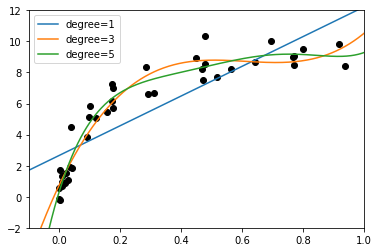

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# uniformly sample 500 even points between -0.1 and 1.1
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

# plot original data
plt.scatter(X.ravel(), y, color='black')

# plot polynomial curves of different degrees using unseen test data
for degree in [1, 3, 5]:
  # train the polynomial regression model and predict on test data
  y_preds = PolynomialRegression(degree).fit(X, y).predict(X_test)
  # plot polynomial curve against orignal data
  plt.plot(X_test.ravel(), y_preds, label='degree={0}'.format(degree))

# set x and y axis limits
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
# place legend
plt.legend(loc='best')

In [ ]:
from sklearn.model_selection import validation_curve

# select a range of polynomial degrees to test
degrees = np.arange(0, 21)

# calculate training and validation scores for varying degrees using 7 fold cross validation
train_score, val_score = validation_curve(estimator=PolynomialRegression(),
                                          X=X,
                                          y=y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degrees, cv=7)

Text(0, 0.5, 'score')

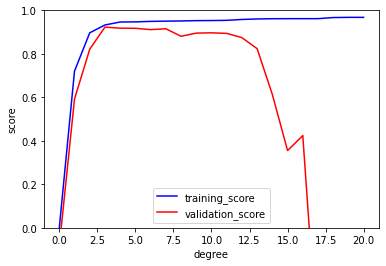

In [ ]:
# plot training set learning curve
plt.plot(degrees, np.median(train_score, 1), color='b', label='training_score')
# plot validation set learning curve
plt.plot(degrees, np.median(val_score, 1), color='r', label='validation_score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

Optimal degree value for polynomial regression is 3 to avoid underfitting and overfitting and balancing bias and variance.

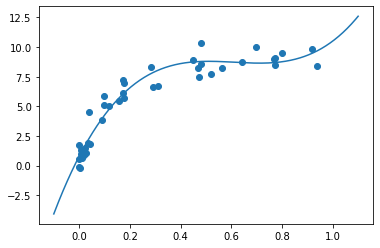

In [ ]:
# plot original data
plt.scatter(X.ravel(), y)
# train polynomial regression model using optimal degree value
y_preds = PolynomialRegression(3).fit(X, y).predict(X_test)
# plot polynomial regression prediction from test data
plt.plot(X_test.ravel(), y_preds)

Optimal model will depend on the size of the training set.

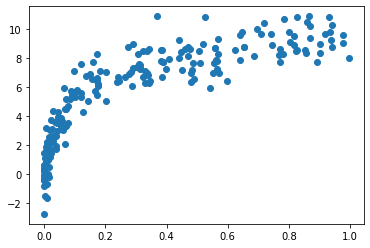

In [ ]:
# larger data set of 200 samples
big_X, big_y = make_data(200)
# plot larger dataset
plt.scatter(big_X.ravel(), big_y)

In [ ]:
# select a range of polynomial degrees to test
degrees = np.arange(0, 21)
# training and validation scores for larger data set
big_train_score, big_val_score = validation_curve(estimator=PolynomialRegression(),
                                          X=big_X,
                                          y=big_y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degrees, cv=7)

Text(0, 0.5, 'score')

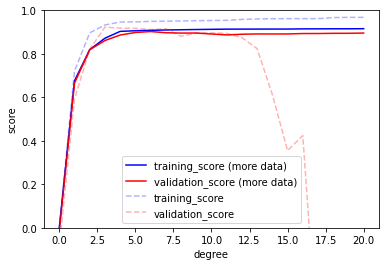

In [ ]:
# plot learning curves for larger data set as solid lines
plt.plot(degrees, np.median(big_train_score, 1), color='b', label='training_score (more data)')
plt.plot(degrees, np.median(big_val_score, 1), color='r', label='validation_score (more data)')
# plot learning curves for original data set as dashed lines
plt.plot(degrees, np.median(train_score, 1), alpha=0.3,
         color='b', label='training_score', linestyle='dashed')
plt.plot(degrees, np.median(val_score, 1), alpha=0.3,
         color='r', label='validation_score', linestyle='dashed')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

More data supports a more complex model with a higher polynomial degree. The peak of the validation curve gives an optimal degree value of 6 (instead of 3).

**Learning curve** - A plot of the training/validation score as a function of the increasing size of the traniing set.

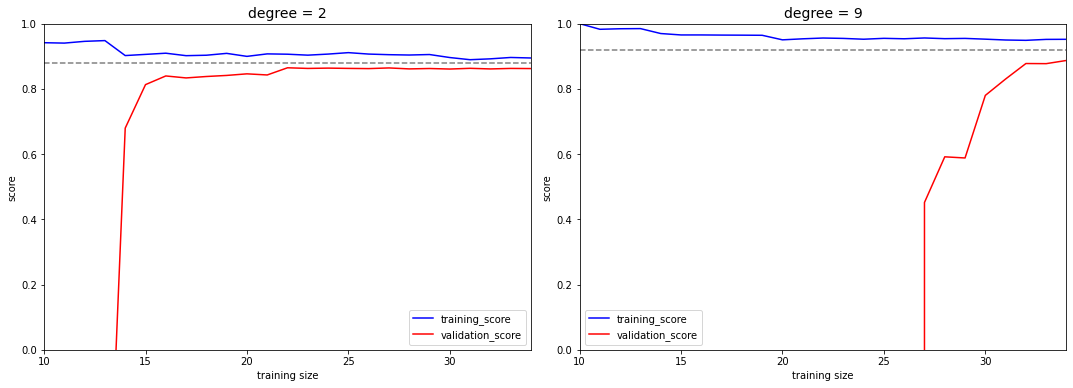

In [ ]:
from sklearn.model_selection import learning_curve

# create subplots to show how the size of training data impacts learning curves
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, # left position of subplots as fraction of fig size
                    right=0.95, # right position of subplots as fraction of fig size
                    wspace=0.1 # width of passing between subplots
                    )

# experiment with varying complexities of polynomial regression models
for i, degree in enumerate([2, 9]):
  # learning curve for polynomial regression model with varying datasets
  N, train_curve, val_curve = learning_curve(PolynomialRegression(degree), X, y, 
                                             cv=7, # 7-fold cross-val
                                             # fraction of data for training sets 
                                             train_sizes=np.linspace(0.3, 1, 25))
  
  # plot mean train score (across all cv folds) for each training set size
  ax[i].plot(N, np.mean(train_curve, 1), color='b', label='training_score')
  # plot mean val score (across all cv folds) for each training set size
  ax[i].plot(N, np.mean(val_curve, 1), color='r', label='validation_score')
  # mean between final converged train score and val score
  ax[i].hlines(np.mean([train_curve[-1], val_curve[-1]]), N[0], N[-1],
               color='gray', linestyle='dashed')
  
  # set axes ranges
  ax[i].set_ylim(0, 1)
  ax[i].set_xlim(N[0], N[-1])
  # label axes
  ax[i].set_xlabel('training size')
  ax[i].set_ylabel('score')
  # set title
  ax[i].set_title('degree = {0}'.format(degree), size=14)
  # position legend
  ax[i].legend(loc='best')

When the learning curve has already converged, no amount of extra data will improve performance (left panel)

Using a more complex model, incrases the final score of convergence (dashed line) but leads to higher variance (greater distance between the training curve and validation curve).

### Grid Search

Systematically search the space of values for model hyperparameters and find the optimal values.

In [ ]:
from sklearn.model_selection import GridSearchCV

# set parameters to optimize with grid search
params = {'polynomialfeatures__degree': np.arange(21), # polynomial degree range
          'linearregression__fit_intercept': [True, False], # fit intercept flags
          #'linearregression__normalize': [True, False]
          } # normalize data flags

# train and test the model using grid search to find best parameter values
grid_search = GridSearchCV(PolynomialRegression(), params, cv=7)

In [ ]:
# fit data each grid point like any other estimator
grid_search.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [ ]:
# print best parameters for the model found by grid search
print(grid_search.best_params_)

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}


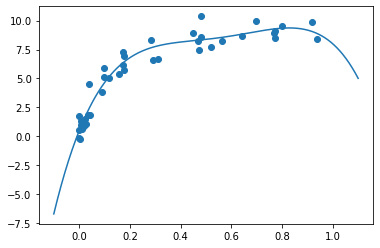

In [ ]:
# select the best model instance found from grid search
model = grid_search.best_estimator_
# predict using best estimator
y_preds = model.fit(X, y).predict(X_test)

# plot original data and prediction line
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_preds)